In [64]:
import pandas as pd

df = pd.read_csv("rawdata-mdb.csv")

df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ts,topic,board,firmware,chipid,freeheap,wifi_level,fs_usedBytes,max_loop_wdt_cnt
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,esp8266,RM1,204cfe,37240,-52,343870,1203
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,esp8266,RM1,204cfe,37352,-52,343870,1203
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,esp8266,RM1,204cfe,37352,-52,343870,1203
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,esp8266,RM1,204cfe,36680,-52,343870,1203
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,esp8266,RM1,204cfe,36568,-50,343870,1203
...,...,...,...,...,...,...,...,...,...
595582,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37048,-42,221633,314
595583,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36488,-44,221633,314
595584,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37272,-41,221633,314
595585,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36600,-41,221633,314


In [65]:
cols = ['freeheap','wifi_level','fs_usedBytes','max_loop_wdt_cnt']
df = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

df.dtypes

freeheap            float64
wifi_level          float64
fs_usedBytes        float64
max_loop_wdt_cnt    float64
dtype: object

In [66]:
df.isnull().any()

freeheap            True
wifi_level          True
fs_usedBytes        True
max_loop_wdt_cnt    True
dtype: bool

In [67]:
df = df.dropna()

df

,freeheap,wifi_level,fs_usedBytes,max_loop_wdt_cnt
0,37240.0,-52.0,343870.0,1203.0
1,37352.0,-52.0,343870.0,1203.0
2,37352.0,-52.0,343870.0,1203.0
3,36680.0,-52.0,343870.0,1203.0
4,36568.0,-50.0,343870.0,1203.0
...,...,...,...,...
595582,37048.0,-42.0,221633.0,314.0
595583,36488.0,-44.0,221633.0,314.0
595584,37272.0,-41.0,221633.0,314.0
595585,36600.0,-41.0,221633.0,314.0


In [68]:
df.isnull().any()

freeheap            False
wifi_level          False
fs_usedBytes        False
max_loop_wdt_cnt    False
dtype: bool

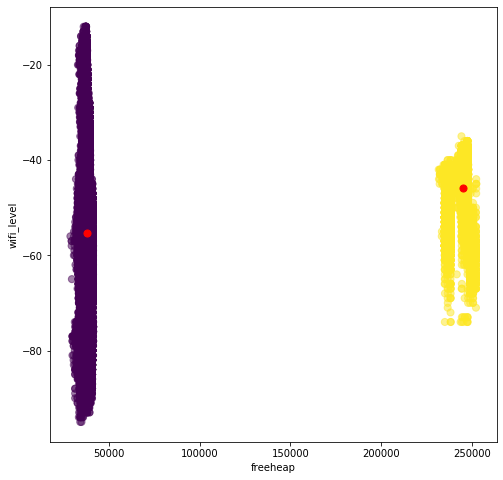

In [69]:
import matplotlib.pyplot as plt

df2 = df[['freeheap', 'wifi_level']].copy()

kmeans = KMeans(n_clusters=2).fit(df2)
centroids = kmeans.cluster_centers_

plt.figure(figsize = (8,8))

plt.scatter(df2['freeheap'], df2['wifi_level'],
            c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.xlabel("freeheap")
plt.ylabel("wifi_level")

plt.show()

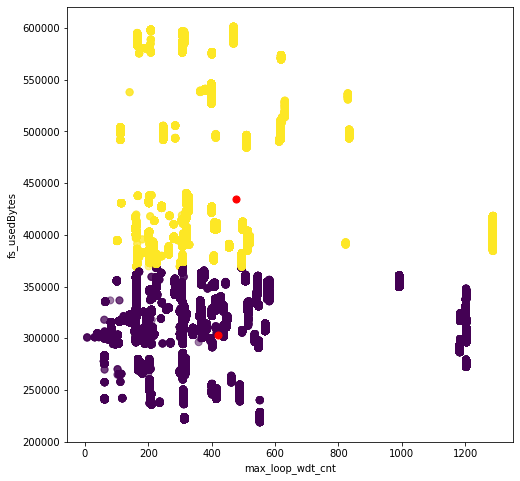

In [70]:
df2 = df[['max_loop_wdt_cnt', 'fs_usedBytes']].copy()

kmeans = KMeans(n_clusters=2).fit(df2)
centroids = kmeans.cluster_centers_

plt.figure(figsize = (8,8))

plt.scatter(df2['max_loop_wdt_cnt'], df2['fs_usedBytes'],
            c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.xlabel("max_loop_wdt_cnt")
plt.ylabel("fs_usedBytes")

plt.show()

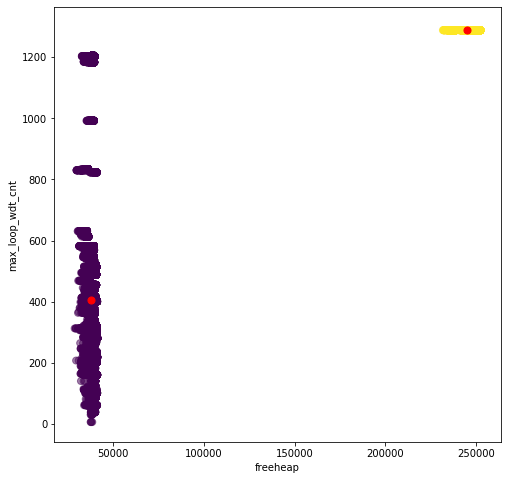

In [71]:
df2 = df[['freeheap', 'max_loop_wdt_cnt']].copy()

kmeans = KMeans(n_clusters=2).fit(df2)
centroids = kmeans.cluster_centers_

plt.figure(figsize = (8,8))

plt.scatter(df2['freeheap'], df2['max_loop_wdt_cnt'],
            c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.xlabel("freeheap")
plt.ylabel("max_loop_wdt_cnt")

plt.show()

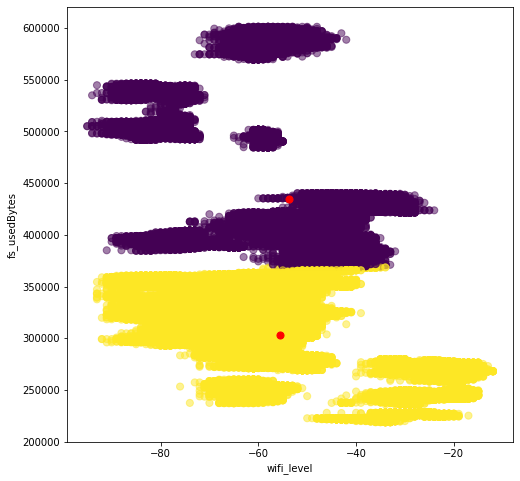

In [72]:
df2 = df[['wifi_level', 'fs_usedBytes']].copy()

kmeans = KMeans(n_clusters=2).fit(df2)
centroids = kmeans.cluster_centers_

plt.figure(figsize = (8,8))

plt.scatter(df2['wifi_level'], df2['fs_usedBytes'],
            c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.xlabel("wifi_level")
plt.ylabel("fs_usedBytes")

plt.show()

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(df)
df['kmean'] = kmeans.labels_

df

,freeheap,wifi_level,fs_usedBytes,max_loop_wdt_cnt,kmean
0,37240.0,-52.0,343870.0,1203.0,1
1,37352.0,-52.0,343870.0,1203.0,1
2,37352.0,-52.0,343870.0,1203.0,1
3,36680.0,-52.0,343870.0,1203.0,1
4,36568.0,-50.0,343870.0,1203.0,1
...,...,...,...,...,...
595582,37048.0,-42.0,221633.0,314.0,1
595583,36488.0,-44.0,221633.0,314.0,1
595584,37272.0,-41.0,221633.0,314.0,1
595585,36600.0,-41.0,221633.0,314.0,1


In [74]:
import pickle

pickle.dump(kmeans, open("esp8266_classifier.pkl", "wb"))

In [79]:
import pandas as pd

df = pd.read_csv("rawdata-mdb.csv")

df3 = df.copy()

cols = ['freeheap','wifi_level','fs_usedBytes','max_loop_wdt_cnt']

df3[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
df3 = df3.dropna()

df3

,ts,topic,board,firmware,chipid,freeheap,wifi_level,fs_usedBytes,max_loop_wdt_cnt
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,esp8266,RM1,204cfe,37240.0,-52.0,343870.0,1203.0
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,esp8266,RM1,204cfe,37352.0,-52.0,343870.0,1203.0
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,esp8266,RM1,204cfe,37352.0,-52.0,343870.0,1203.0
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,esp8266,RM1,204cfe,36680.0,-52.0,343870.0,1203.0
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,esp8266,RM1,204cfe,36568.0,-50.0,343870.0,1203.0
...,...,...,...,...,...,...,...,...,...
595582,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37048.0,-42.0,221633.0,314.0
595583,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36488.0,-44.0,221633.0,314.0
595584,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37272.0,-41.0,221633.0,314.0
595585,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36600.0,-41.0,221633.0,314.0


In [81]:
df3['kmean'] = kmeans.labels_

df3

,ts,topic,board,firmware,chipid,freeheap,wifi_level,fs_usedBytes,max_loop_wdt_cnt,kmean
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,esp8266,RM1,204cfe,37240.0,-52.0,343870.0,1203.0,1
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,esp8266,RM1,204cfe,37352.0,-52.0,343870.0,1203.0,1
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,esp8266,RM1,204cfe,37352.0,-52.0,343870.0,1203.0,1
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,esp8266,RM1,204cfe,36680.0,-52.0,343870.0,1203.0,1
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,esp8266,RM1,204cfe,36568.0,-50.0,343870.0,1203.0,1
...,...,...,...,...,...,...,...,...,...,...
595582,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37048.0,-42.0,221633.0,314.0,1
595583,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36488.0,-44.0,221633.0,314.0,1
595584,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37272.0,-41.0,221633.0,314.0,1
595585,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36600.0,-41.0,221633.0,314.0,1


In [82]:
df3[['firmware','kmean','board']].groupby(['firmware','kmean']).count()

board
firmware  kmean        
ArCond2   0       16384
R4x2      0       53644
R4x2o     1       51049
R4x4ir    0       11242
          1       13343
R4x4ir5   1       47458
R4x4o     1       25494
RM        1      112168
RM1       1       84060
RM1t10o   1       59498
RM6       0       21886
RM8       0       24329
TV4x2     0       54758
          1          76
WifiModem 1       20165